YOLOという物体検出のモデルを簡単に自分の環境で使う方法を解説していきます。<br>
YOLOはアップデートをされ続けており、高精度誇るモデルでSSDとよく比較されます。<br>
実装もかなり楽なので、今では誰でも物体検出が体験できます。


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/YOLOV3

/content/drive/MyDrive/YOLOV3


## 必要なライブラリをインストール

YOLOを導入するにあたって、


1.   daskー並列演算
2.   Cythonーコンパイル用

という２つのライブラリをインストールします。
<br>逆に言えば、これさえインストールすれば、誰でも使うことができます。


In [3]:
!pip install dask --upgrade
!pip install Cython

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 132 kB 61.5 MB/s 
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


## YOLOの準備

すでにYOLOに必要なファイルをまとめたレポジトリが公開されています。<br>
そのフォルダをまとめてインストールしていきます。<br>
完了後、darknetというフォルダが入っていると思います。

In [4]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5940, done.
remote: Total 5940 (delta 0), reused 0 (delta 0), pack-reused 5940
Receiving objects: 100% (5940/5940), 6.36 MiB | 7.51 MiB/s, done.
Resolving deltas: 100% (3926/3926), done.
Checking out files: 100% (979/979), done.


In [5]:
# インストールしたフォルダに移動
%cd darknet

/content/drive/MyDrive/YOLOV3/darknet


取得したファイルをコンパイルするために,
makeコマンドを使用します。<br>
Colabを使えばかなり早いです。

In [6]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

さらに学習済みモデルをインストールしておきます。<br>
YOLOv3の重み付きのモデルを指定して同じフォルダに入れます。

In [7]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-11-08 08:07:32--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  46.8MB/s    in 5.3s    

2021-11-08 08:07:37 (44.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



## YOLOを実行してみる

あとはコマンドを打ち込むだけで物体検出ができます。<br>
基本的なコマンドは共通で、後は検出したい画像に合わせて変えるだけです。

下記のコマンドは.cfgまでは「こういう書き方をする」と覚えておけばとりあえずは大丈夫。<br>
あとは使用するモデルの選択と画像の指定をしているだけです。

もし拾ってきた画像を使うのであれば、dataのフォルダに入れてdata/~~の~~の部分にファイル名を入れるだけです。<br>
下記はサンプル画像の検出なので、結果を見てみましょう。

In [13]:
! ./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

上は結果を表示しています。<br>
どんな画像を使ってどんな結果になったのかを可視化してみましょう。

## 結果を可視化

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

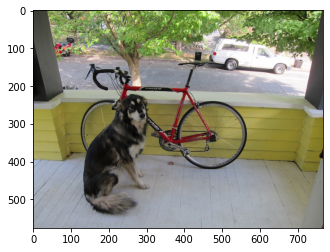

In [10]:
# 元画像の表示
im = Image.open('data/dog.jpg')
plt.imshow(im)

物体検地を実行後はpredictions.jpgというファイルができています。<br>
これが検知した結果です。

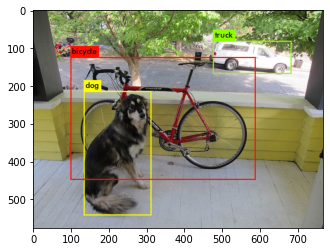

In [15]:
# 検出した画像の表示
im = Image.open('predictions.jpg')
plt.imshow(im)

トラックと自転車、犬が位置情報として検出できています。<br>
さらに他の画像も試してみましょう。

## YOLOの物体検出のデモンストレーション

In [16]:
! ./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

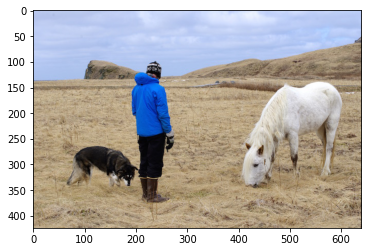

In [17]:
# 元画像の表示
im = Image.open('data/person.jpg')
plt.imshow(im)

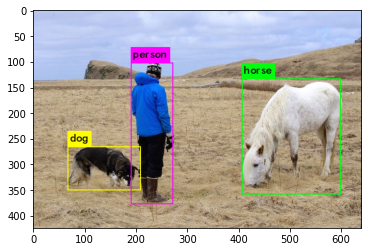

In [18]:
im = Image.open('predictions.jpg')
plt.imshow(im)

In [19]:
! ./darknet detect cfg/yolov3.cfg yolov3.weights data/meeting.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

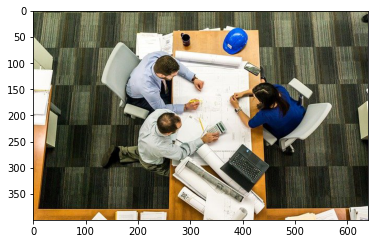

In [20]:
im = Image.open('data/meeting.jpg')
plt.imshow(im)

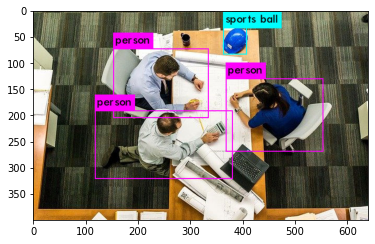

In [21]:
im = Image.open('predictions.jpg')
plt.imshow(im)

かなり簡単に導入できていますね。<br>
最後のヘルメットはスポーツボールと間違っていますが、<br>学習させてないものは上手く検出できないというのが学習済みモデルの欠点でもあります。

しかし、人は上からの視点でも検出できています。<br>
このようにYOLOは基本的なものは簡単に実装できることは、少なくとも分かると思います。